### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: April 27, 6pm**
<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team has now equipped with all the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.


# Background about Elevator Pitch (90 seconds) and Shark Tank

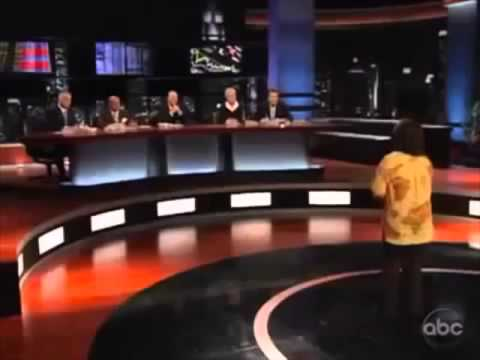

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo("mrSmaCo29U4")

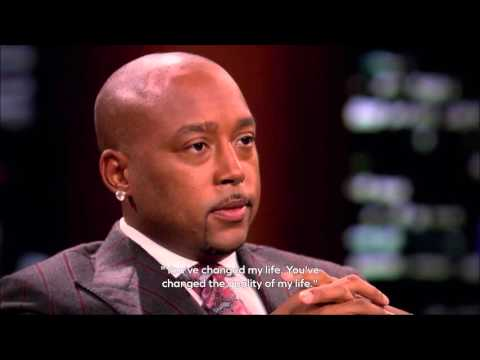

In [37]:
YouTubeVideo("xIq8Sg59UdY")

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:

Understand when an article, published online, is likely to be "popular" in comparison to other articles released in similar formats.  More precisely, the goal is to predict--before publication--whether an article is likely to be unpopular.

2) Why the problem is important to solve? 

Text-based content (articles, news, blogs, etc.) is now largely consumed via online platforms.  Without hard-copy sales numbers (as in the case of books and newspapers) to judge performance, those producing this content still need to understand the popularity of the articles they publish.  A method of understanding likely popularity, before publication, can be extremely useful in deciding which content to release, as well as in attracting potential advertisers.


3) What is your idea to solve the problem? 

Social media platforms have become the primary outlet for many to share their opinions.  Thus while there are many measures to judge an articles "popularity" (such as page-visits, or external links) we choose to use the number of shares via social media as our metric of "popularity."
    
Moreover, while the specific words in an article influence the reader's enjoyment, the structure of the article itself also plays a role in its popularity.  For example, perhaps longer articles are not read when published on a Monday.  Technology articles with very short titles may not generate interest.  Rather than considering the individual tokens within the text, we will used structure-based analysis.

Lastly, we will use ensemble-learning to make final predictions.  While this may sacrifice some accuracy, it will help to decrease false negatives (the costly real-world mistake in this problem).


4) What differences you could make with your data science approach?

The use of structure-based article statistics offer a few advantages.  First, this data can be computed and compared for all articles, regardless of the number available.  This is especially useful if the number of training articles is small: there may be little (or no relevant) overlap in the individual text tokens.  Second, choosing these predictors keeps our data low-dimensional.  The number of token-based predictors for a collection of texts grows very quickly, resulting in very high-dimensional data.  Fixing a number of structure-based predictors bounds the dimension of our data, giving us a better chance for accurate prediction.  Lastly, these structure-based statistics offer interpretability: this could lead to suggestion features in our software (such as "increasing the title length will improve popularity" or "use shorter words in the first and last sentence to improve popularity").
  

5) Why do you believe the idea deserves the investment of the "sharks"?

Studies indicate that more and more people rely on online outlets to receive news and information.  The amount of content generated online continues to grow as well.  Thus the ability to understand, before release, an article's likelihood of success will become increasingly beneficial to online contributors.  Utilizing structure-based analytics appeals to all contributors of online content.  Large-scale publications may use our services with confidence that their pre-release content cannot be leaked.  Large amounts of online content is generated by individuals.  Professional bloggers, freelance writers, and "contributing authors," depend on article popularity, and social media buzz, to maintain their careers and attract potential advertisers.  Most such individuals will lack the tools (and skills) to perform data analysis, and thus can benefit from our services.

Perhaps most important to potential investors, we are the first pre-release publication service offered in the market: news Media generated $63 Billion in US revenue last year.

---

### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.

### 1) Problem formulation in Math

As described in the previous part, our goal is to predict the "popularity" of an online news article, based on structural features of the text.  To begin, we must determine an appropriate metric of "popularity."  Social media platforms are a primary outlet in which we express our opinions: we often "share" an online article that we believe others should read.  Thus "shares" on social media can be used to estimate popularity.  We will consider two metrics of popularity based on "shares":

#### Popularity
The raw number of shares an article receives.  This metric is only relevant given a base-line number of shares for other articles posted in similar formats.

#### Buzz-Factor
While the total number of shares an article receives can be used to estimate popularity, the speed at which those shares are generated is also of interest.  Suppose articles A and B each receive 2,000 shares.  If article A generated those shares over 6 months, while article B gained the same shares in only 2 days, article B can be judged as more "popular."  The number of shares received per day, an estimate of the share-rate, will be referred to as buzz-factor.

We focus our analysis even further.  It would certainly be useful to be able to estimate the *extent* of an articles popularity, of the utmost interest of content producers is being able to anticipate when an article is *unpopular*.  That is, while it would be convenient to predict whether an article receives 1,500 as opposed to 1,200 shares, it is more important to authors/publishers to predict when an article will receive *very low* numbers of shares.  In this case, it is worthwhile to consider changing the format of the article, or perhaps not releasing the content at all.  Therefore, our aim is to predict when an article will be *unpopular* or generate *no buzz*.  Once again we must define these terms mathematically.

#### Unpopular
Our metric of popularity is number of shares.  We consider an article to be *unpopular* if, among other articles of similar formats, it generates a number of shares which is in the bottom 25%.  That is, given a collection of articles, the unpopular articles are those in percentiles 0-25 in number of shares.

#### No-Buzz
Our metric of popularity is number of shares per day.  We consider an article to have *no buzz* if, among other articles of similar formats, it generates a buzz which is in the bottom 25%.  That is, given a collection of articles, the articles with no-buzz are those in percentiles 0-25 in number of shares.

Therefore, our business problem can be phrased mathematically as follows:

#### *Given a collection of online news arctiles (of similar formats or origin) predict, which among those, will rank in the bottom 25% in numbers of shares or number of shares per day.*


### 2) Math Solution

We make a deliberate choice of how to transform articles into data for analysis.  Specifically, we choose to compute attributes based on the structure of the article, as opposed to the textual content.  This offers a few advantages:

* If the sample size of comparable articles is small, there may be little (or at least little relevant) overlap in the tokens contained within the text.
* Attributes based on the structure of an article may be computed for any text, and are comparable in a meaningful way regardless of the number of similar documents available.
* Software can be sent to customers which inputs an article, and outputs a set of structure-based attributes.  This data can then be relayed to our services for analyis.  This enables us to perform data analysis without needing access to the original text, thereby protecting the unpublished content of our customers.

#### Attributes

The following attributes are computed for training (comparable) articles:
* Number of "Shares" on social media ('shares')
* Number of days since publication ('timedelta')

The following attributes are computed for training and testing articles:
* Number of words in the Title ('n_tokens_title')
* Number of words in the text body ('n_tokens_content',)
* Number of unique words in the text body ('n_unique_tokens')
* Number of unique non-stop words in the text body ('n_non_stop_unique_tokens')
* Number of videos included in the article ('num_videos')
* Number of images included in the article ('num_imgs')
* Average word length ('average_token_length')
* Number of keywords associated with the article ('num_keywords')
* Genre of the article (As 6 dummy variables)
    * 'is_lifestyle','is_entertainment','is_business','is_social_media','is_tech','is_world'
* Day of the week of publication (As 8 dummy variables)
    * 'is_monday','is_tuesday','is_wednesday','is_thursday','is_friday','is_saturday','is_sunday'
    * 'is_weekend'
* Text subjectivity ('global_subjectivity')
* Overal text polarity ('global_sentiment_polarity')
* Rate of positive words in the content ('global_rate_positive_words')
* Rate of negative words in the content ('global_rate_negative_words')
* Rate of positive words among non-neutral ('tokens rate_positive_words')
* Rate of negative words among non-neutral tokens ('rate_negative_words')
* Avg. polarity of positive words ('avg_positive_polarity')
* Min. polarity of positive words ('min_positive_polarity')
* Max. polarity of positive words ('max_positive_polarity')
* Avg. polarity of negative words ('avg_negative_polarity')
* Min. polarity of negative words ('min_negative_polarity ')
* Max. polarity of negative words ('max_negative_polarity')
* Title Subjectivity ('title_subjectivity')
* Title Polarity ('title_sentiment_polarity')

For each training article, we split the articles into four "popularity" bins based on percentile of 'shares'
* 0-25%-- "Unpopular"
* 25%-50%-- "Mildly Popular"
* 50%-75%--"Popular"
* 75%-100%-- "Very Popular"
We store the popularity classification as an additional attribute ('popularity')

For each training article, we compute a 'buzz_factor' attribute,
* buzz_factor = 'shares'/'timedelta'

For each training article we divide the articles into four "buzz" bins based on percentile of 'buzz factor'
* 0-25% "No Buzz"
* 25%-50% "Some Buzz"
* 50%-75% "Buzz"
* 75%-100% "Lots of Buzz"
We store the "buzz" classification as an additional attribute, ('buzz')

#### Target Variables
Our goal is to predict whether or not an article will be "unpopular" or generate "no buzz."  Therefore we generate two boolean variables,
* 'unpopular' (Takes value 'True' if 'popularity' = "unpopular")
* 'no_buzz' (Takes vale 'True' if 'buzz' = "no_buzz")

#### Feature Selection
After all attribute constructions (including a number of dummy variables for classification), our data has approximately 50 predictors.  In order to aid in interpretability of results, we reduce the number of features considered to 10.  We perform this process twice, by using a feature-importance metric to determine those which are most relevant to the target variables ('unpopular', and 'no_buzz').  This is done using the ExtraTreesClassifier on a set of training documents.  The ExtraTreesClassifier is a "class [that] implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting" [Per sklearn documentation].  This class includes a feature_importance attribute, from which we extract the top 10 features.

#### Machine Learning
We now train machine-learning algorithms on the set of (features computed for the ) training documents.  For each target variable, these models only consider the top 10 features determined in the previous step. Our method considers two machine learning algorithms:
* Random Forest Classifier
* KNN (k chosen by cross-validation)

#### Prediction
We use ensemble learning to make predictions.  Given a test article, the machine learning methods above are trained on a set of articles of a similar format or origin.  In order to predict whether the test article will be "unpopular" or generate "no_buzz" each of the three algorithms make a prediction.  We predict that an article is "unpopular" if EITHER of the trained models predict that it is unpopular.  This method likely does not produce the highest accuracy, HOWEVER, it acts to minimize false negatives.  That is, by predicting an article is "unpopular" if either of the models predicts "unpopular", it serves to DECREASE the number of arcticles which are unpopular that we (incorrectly) predict as "popular."  Predicting an unpopular article as "popular" is the more expensive error within real world settings: this method acts to decrease such mistakes.

#### 3) Implementation of the Solution

In [ ]:
# NOTE: THIS CODE IS NOT TO BE RUN, AS IT HAS NO DATA!  IT IS THE SHELL FOR THE CODE, WHICH WILL BE RUN IN PROBLEM 3.

In [ ]:
# GATHERING DATA FROM A WEB ARTICLE & EXTRACTING FEATURES

In [ ]:
# import re
# import nltk
# import pprint
# from urllib import urlopen
# from bs4 import BeautifulSoup
# from collections import Counter

# # Input your own text
# raw = raw_input("Enter some text: ")

# # Online articles
# url = "http://www.foxnews.com/science/2016/04/22/nasa-marks-hubbles-birthday-with-this-captivating-image.html"
# html = urlopen(url).read()
# raw2 = BeautifulSoup(html).get_text()

# # Add to temporary local file
# f = open('text.txt', 'r')
# raw3 = f.read()
# f.close()

In [ ]:
# # Filter stopwords
# stopwords = nltk.corpus.stopwords.words('english')
# text= [w for w in raw3 if w.lower() not in stopwords]
    
# # Number of words in title
# title=[t for t in raw3 if t.istitle()]
# wordcounttitle = Counter(title.split( ))
# n_tokens_title=len(wordcounttitle)

# # Number of words in the text body
# wordcount = Counter(raw3.split( ))
# n_tokens_content=len(wordcount)
# n_tokens_content

# # Number of unique words in text body
# n_unique_tokens=len(set(raw3))
# n_unique_tokens

# #number of unique non-stop words in text body
# n_non_stop_unique_tokens=len(set(text))
# n_non_stop_unique_tokens

# #average word length for original text
# average_token_length=len(text)/n_tokens_content
# average_token_length

# # Text subjectivity
# from textblob import TextBlob
# Global_subjectivity=TextBlob(text).sentiment.subjectivity

# # Overall text poluarity
# Global_sentiment_polarity=TextBlob(text).sentiment.polarity

In [ ]:
#FEATURE IMPORTANCE

In [ ]:
#INPUTS:
#   df: data frame containing the (structure) features for the training data.
#   feautures: list of (non-response) features
#   target: target variable

In [ ]:
#feature_selection_model = ExtraTreesClassifier().fit(df[features], df['unpopular'])
#feature_importance=feature_selection_model.feature_importances_
#importance_matrix=np.array([features,list(feature_importance)]).T

#def sortkey(s):
#    return s[1]

#sort=zip(features,list(feature_importance))
#f = pd.DataFrame(sorted(sort,key=sortkey,reverse=True),columns=['variables','importance'])[:10]

In [ ]:
# EXTRACT TOP FEATURES, DETERMINE TRAINING DOCUMENTS

In [ ]:
#features2=f['variables']

#split data into two parts
#np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(df[features2], df.unpopular, test_size=0.4, random_state=None)
#x_train.shape

In [ ]:
# ENSEMBLE LEARNING

In [ ]:
# Random Forest 

In [ ]:
#print "RandomForest"
#rf = RandomForestClassifier(n_estimators=100,n_jobs=1)
#clf_rf = rf.fit(x_train,y_train)
#y_predicted_rf = clf_rf.predict(x_test)

In [ ]:
# K-NN: 

In [ ]:
# Determine K by cross-validation.
#x_cv_train, x_cv_test, y_cv_train, y_cv_test = train_test_split(x_train, y_train, test_size=0.3, random_state=None)

# We use K-values ranging from 1-10
# k=[5,10,15,20,25,30,35,40,45,50]

# Train a model on the trainng set and use that model to predict on the testing set
# predicted_knn=[KNeighborsClassifier(n_neighbors=i).fit(x_cv_train,y_cv_train).predict(x_cv_test) for i in k]

#Compute accuracy on the testing set for each value of k
#score_knn=[metrics.accuracy_score(predicted_knn[i],y_cv_test) for i in range(10)]

# Plot accuracy on the test set vs. k
#fig=plt.figure(figsize=(8,6))
#plt.plot([5,10,15,20,25,30,35,40,45,50], score_knn, 'bo--',label='knn')
#plt.xlabel('K')
#plt.ylabel('score')

In [1]:
# Make predictions based on the best model above
# y_predicted_knn = KNeighborsClassifier(n_neighbors=6).fit(x_train,y_train).predict(x_test)

In [59]:
####FINAL PREDICTIONS: ENSEMBLE LEARNING
#y_predicted = y_predicted_knn + y_predicted_rf
#cm = metrics.confusion_matrix(y_test, y_predicted)
#print(cm)
#plt.matshow(cm)
#plt.title('Confusion matrix')
#plt.colorbar()
#plt.ylabel('True label')
#plt.xlabel('Predicted label')
#plt.show()

#print 'Prediction Accuracy'
#print (cm[0,0]+cm[1,1])/float(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])

### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

### Global Imports & Variables

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = 'data/OnlineNewsPopularity.csv'
hdf_path = 'data/online_news_popularity.h5'

blue = '#5898f1'
green = '#00b27f'
yellow = '#FEC04C'
red = '#fa5744'

### Download data, unzip, and save .csv

In [28]:
import requests, StringIO, csv, zipfile, sys

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip'
request = requests.get(url)
print "Downloading data ...\nRequest status: {}".format(request.status_code)
archive = ZipFile(StringIO.StringIO(request.content))
print "Unzipping ..."
csv_data = archive.read('OnlineNewsPopularity/OnlineNewsPopularity.csv', 'r')

outfile = file(csv_path, 'w')
outfile.write(csv_data)
print "Saving into {}".format(csv_path)
outfile.close()

Request status: 200
Unzipping ...
Saving into data/OnlineNewsPopularity.csv


### Read .csv file into Pandas Data Frame &  save into HDF5 (Hierarchical Data Format)

In [2]:
# Read .csv file into data frame
data_frame = pd.read_csv(csv_path, sep=', ', engine='python')

# Rename *channel* columns
data_frame.rename(columns={
        'data_channel_is_lifestyle': 'is_lifestyle',
        'data_channel_is_entertainment': 'is_entertainment',
        'data_channel_is_bus': 'is_business',
        'data_channel_is_socmed': 'is_social_media',
        'data_channel_is_tech': 'is_tech',
        'data_channel_is_world': 'is_world',
    }, inplace=True)

# Rename *weekday* columns
data_frame.rename(columns={
        'weekday_is_monday': 'is_monday',
        'weekday_is_tuesday': 'is_tuesday',
        'weekday_is_wednesday': 'is_wednesday',
        'weekday_is_thursday': 'is_thursday',
        'weekday_is_friday': 'is_friday',
        'weekday_is_saturday': 'is_saturday',
        'weekday_is_sunday': 'is_sunday',
    }, inplace=True)

# Store data into HDF5 file
data_hdf = pd.HDFStore(hdf_path)
data_hdf['data_frame'] = data_frame
data_hdf.close()

### Read HDF5 file into Pandas Data Frame

In [3]:
# Read .h5 file into data frame
data_frame = pd.read_hdf(hdf_path)

# Drop columns included in the sample Dataset that are not considered in our methods.
data_frame.drop('LDA_00', axis=1, inplace=True)
data_frame.drop('LDA_01', axis=1, inplace=True)
data_frame.drop('LDA_02', axis=1, inplace=True)
data_frame.drop('LDA_03', axis=1, inplace=True)
data_frame.drop('LDA_04', axis=1, inplace=True)
data_frame.drop('kw_min_min', axis=1, inplace=True)
data_frame.drop('kw_max_min', axis=1, inplace=True)
data_frame.drop('kw_avg_min', axis=1, inplace=True)
data_frame.drop('kw_min_max', axis=1, inplace=True)
data_frame.drop('kw_max_max', axis=1, inplace=True)
data_frame.drop('kw_avg_max', axis=1, inplace=True)
data_frame.drop('kw_min_avg', axis=1, inplace=True)
data_frame.drop('kw_max_avg', axis=1, inplace=True)
data_frame.drop('kw_avg_avg', axis=1, inplace=True)
data_frame.drop('n_non_stop_words', axis=1, inplace=True)
data_frame.drop('url', axis=1, inplace=True)

# Data frame column headers
list(data_frame)

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'is_lifestyle',
 'is_entertainment',
 'is_business',
 'is_social_media',
 'is_tech',
 'is_world',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'is_monday',
 'is_tuesday',
 'is_wednesday',
 'is_thursday',
 'is_friday',
 'is_saturday',
 'is_sunday',
 'is_weekend',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'shares']

#### Remove outliers if applicable

In [4]:
# keep points that are within +2 to -2 standard deviations in column 'Data'.
df = data_frame[data_frame.shares-data_frame.shares.mean()<=(2*data_frame.shares.std())]
df.shape

(39130, 45)

Added 'buzz_factor' column: "Buzz-Factor" (using shares/day)

In [5]:
buzz_factor = df['shares'] / df['timedelta']

Added 'popularity' column: split # of shares into 4 "popularity" bins:

* 0-25%-- "Unpopular"
* 25%-50%-- "Mildly Popular"
* 50%-75%--"Popular"
* 75%-100%-- "Very Popular"

In [6]:
popularity = pd.qcut(df['shares'], 4,  labels=[
        "Unpopular",
        "Midly Popular",
        "Popular",
        "Very Popular"
    ])

In [7]:
# Add these two statistics to the Data Frame

df.is_copy = False # turn off chain index warning
df['buzz_factor'] = buzz_factor.values
df['popularity'] = popularity.values

Similarly, split *buzz factor* into four percentile bins:
* 0-25% "No Buzz"
* 25%-50% "Some Buzz"
* 50%-75% "Buzz"
* 75%-100% "Lots of Buzz"

In [8]:
buzz = pd.qcut(df['buzz_factor'], 4,  labels=["No Buzz","Some Buzz","Buzz","Lots of Buzz"])
df['buzz']=buzz.values

The real quantity of interest here is, in some sense, the LEAST successful articles.  While it is interesting to predict the level of popularity/buzz factor, what we need (at the very least) to be able to do is predict whether an article will be "unpopular" or generate "no buzz."  Thus we isolate these two bins.

In [9]:
# Compute Target variables and add to data frame

unpopular = df['popularity']== 'Unpopular'
df['unpopular'] = unpopular

no_buzz = df['buzz']=='No Buzz'
df['no_buzz'] = no_buzz

df.shape

(39130, 50)

popularity
Unpopular         9798
Midly Popular    10284
Popular           9573
Very Popular      9475
Name: shares, dtype: int64


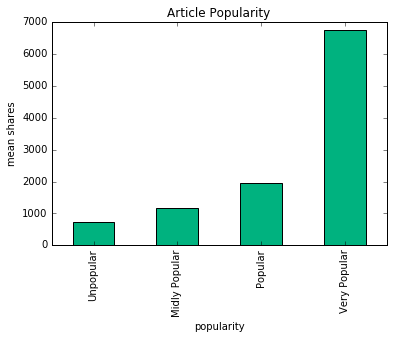

In [37]:
# Brief Exploration of the "Popularity" classes: Consider mean number of shares per "popularity" bin

df_popularity = df.pivot_table('shares', index='popularity', aggfunc='mean')
df_popularity_count = df.pivot_table('shares', index='popularity', aggfunc='count')
print df_popularity_count

df_popularity.plot(kind='bar', color=green)
plt.title('Article Popularity')
plt.ylabel('mean shares')

buzz
No Buzz         9784
Some Buzz       9787
Buzz            9777
Lots of Buzz    9782
Name: buzz_factor, dtype: int64


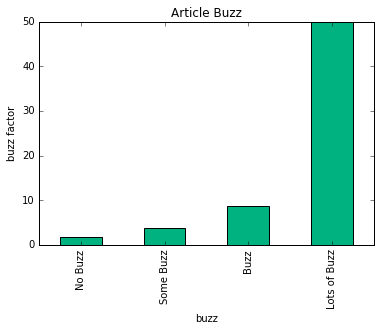

In [34]:
# Brief Exploration of the "buzz" classes: Consider mean number of shares per day for each "buzz" bin

df_buzz = df.pivot_table('buzz_factor', index='buzz', aggfunc='mean')
df_buzz_count = df.pivot_table('buzz_factor', index='buzz', aggfunc='count')
print df_buzz_count

df_buzz.plot(kind='bar', color=green)
plt.title('Article Buzz')
plt.ylabel('buzz factor')

In [21]:
# Isolate non-response features

all_features = df.columns.values
excluded_features = [
    'buzz',
    'buzz_factor',
    'no_buzz',
    'popularity',
    'shares',
    'unpopular'
]

features = [f for f in all_features if f not in excluded_features]

#### Import Sklearn packages.

In [22]:
from sklearn import preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
import pandas as pd
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.lda import LDA
from sklearn.qda import QDA
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn import cross_validation, metrics
from sklearn.naive_bayes import BernoulliNB
from time import time

/Users/thomasmeagher/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/thomasmeagher/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


# Unpopular Articles

At the very least, we want our software to predict whether an article will be unpopular.  In this case, we define Unpopular as belonging in the bottom 25% in terms of shares amongst articles on a similar platform.

In [48]:
# Rank features by importance
feature_selection_model = ExtraTreesClassifier().fit(df[features], df['unpopular'])
feature_importance=feature_selection_model.feature_importances_
importance_matrix=np.array([features,list(feature_importance)]).T

def sortkey(s):
    return s[1]

sort=zip(features,list(feature_importance))

# Extract top 10 important features
f = pd.DataFrame(sorted(sort,key=sortkey,reverse=True),columns=['variables','importance'])[:10]
f

,variables,importance
0,timedelta,0.042315
1,n_tokens_title,0.034149
2,num_keywords,0.033873
3,global_subjectivity,0.033185
4,global_rate_positive_words,0.032546
5,n_non_stop_unique_tokens,0.031968
6,average_token_length,0.031548
7,avg_positive_polarity,0.031220
8,n_unique_tokens,0.031083
9,global_rate_negative_words,0.031060


In [49]:
features2=f['variables']

#split data into two parts
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(df[features2], df.unpopular, test_size=0.4, random_state=None)
x_train.shape

(23478, 10)

In [50]:
# Decision Tree accuracy and time elapsed caculation
#t0=time()
#print "DecisionTree"
#dt = DecisionTreeClassifier(min_samples_split=25,random_state=1)
#clf_dt=dt.fit(x_train,y_train)
#y_predicted_dt = clf_dt.predict(x_test)
#t1=time()

In [51]:
# Observe how decision tree performed on its own.
#print(metrics.classification_report(y_test, y_predicted_dt))
#print "time elapsed: ", t1-t0

In [52]:
# Random Forest 

# Trainc classifier and time elapsed caculation
t2=time()

print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=1)
clf_rf = rf.fit(x_train,y_train)
y_predicted_rf = clf_rf.predict(x_test)
t3=time()

RandomForest


In [53]:
# See how Random forest performed on its own.
print "Acurracy: ", clf_rf.score(x_test,y_test)
print "time elapsed: ", t3-t2

Acurracy:  0.749233324815
time elapsed:  10.780495882


[0.69278818852924473, 0.73750709823963656, 0.73324815445769453, 0.74204997160704145, 0.74048835888699605, 0.74531516183986368, 0.74503123225440093, 0.74602498580352072, 0.74545712663259511, 0.7464508801817149]


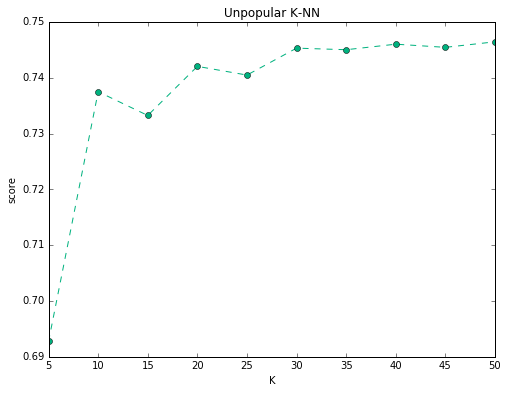

In [54]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

# Determine K by cross-validation.
x_cv_train, x_cv_test, y_cv_train, y_cv_test = train_test_split(x_train, y_train, test_size=0.3, random_state=None)

# We use K-values ranging from 1-10
k=[5,10,15,20,25,30,35,40,45,50]

# Train a model on the training set and use that model to predict on the testing set
predicted_knn=[KNeighborsClassifier(n_neighbors=i).fit(x_cv_train,y_cv_train).predict(x_cv_test) for i in k]

#Compute accuracy on the testing set for each value of k
score_knn=[metrics.accuracy_score(predicted_knn[i],y_cv_test) for i in range(10)]

print score_knn

# Plot accuracy on the test set vs. k
fig=plt.figure(figsize=(8,6))
plt.plot([5,10,15,20,25,30,35,40,45,50], score_knn, 'bo--',label='knn', color=green)
plt.title('Unpopular K-NN')
plt.xlabel('K')
plt.ylabel('score')

In [29]:
# Make predictions based on best model above
y_predicted_knn = KNeighborsClassifier(n_neighbors=6).fit(x_train,y_train).predict(x_test)

[[11104   641]
 [ 3531   376]]


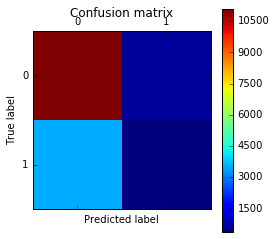

In [32]:
# See how KNN did on its own.
# Print and plot a confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted_knn)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Final Predictions: Ensemble Learning

[[10877   868]
 [ 3353   554]]


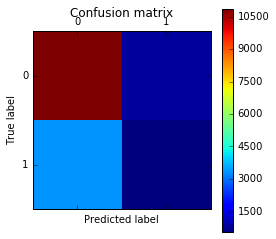

Prediction Accuracy
0.730322003578


In [33]:
# Predict unpopular = True if either RF or KNN predict unpopular = True
y_predicted = y_predicted_knn + y_predicted_rf

#Print and plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print prediction Accuracy
print 'Prediction Accuracy'
print (cm[0,0]+cm[1,1])/float(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])

# Articles with no Buzz

At the very least, we want our software to predict whether an article will generate no "buzz". In this case, we define "no buzz" as belonging in the bottom 25% in terms of shares per day amongst articles published on a similar platform.

In [59]:
# Select features
all_features = df.columns.values
excluded_features = [
    'buzz',
    'buzz_factor',
    'no_buzz',
    'popularity',
    'shares',
    'timedelta',
    'unpopular'
]
features1 = [f for f in all_features if f not in excluded_features]

In [60]:
#Rank features by importance
feature_selection_model = ExtraTreesClassifier().fit(df[features1], df['no_buzz'])
feature_importance=feature_selection_model.feature_importances_
importance_matrix=np.array([features, list(feature_importance)]).T
def sortkey(s):
    return s[1]
sort=zip(features,list(feature_importance))

# Extract top 10 important features
f_b=pd.DataFrame(sorted(sort,key=sortkey,reverse=True),columns=['variables','importance'])[:10]
f_b

,variables,importance
0,timedelta,0.038863
1,n_tokens_content,0.037041
2,num_videos,0.036131
3,num_hrefs,0.035470
4,average_token_length,0.035324
5,global_sentiment_polarity,0.035213
6,n_tokens_title,0.034823
7,n_unique_tokens,0.034630
8,rate_negative_words,0.034058
9,num_self_hrefs,0.033996


In [61]:
features_b=f_b['variables']

#split data into two parts
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(df[features_b], df.no_buzz, test_size=0.4, random_state=None)
x_train.shape

(23478, 10)

In [62]:
# Decision Tree accuracy and time elapsed caculation
#t0=time()
#print "DecisionTree"
#dt = DecisionTreeClassifier(min_samples_split=25,random_state=1)
#clf_dt=dt.fit(x_train,y_train)
#y_predicted = clf_dt.predict(x_test)
#print(metrics.classification_report(y_test, y_predicted))
#t1=time()
#print "time elapsed: ", t1-t0

In [63]:
#Random Forest 

# Train classifier and time elapsed caculation
t2=time()
print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=1)
clf_rf = rf.fit(x_train,y_train)
y_predicted_rf = clf_rf.predict(x_test)

RandomForest


In [64]:
# See how random forest did on its own.
print "Acurracy: ", clf_rf.score(x_test,y_test)
t3=time()
print "time elapsed: ", t3-t2

Acurracy:  0.789355992844
time elapsed:  7.84249997139


[0.7710107893242476, 0.76959114139693352, 0.77668938103350371, 0.77413401476433841, 0.77583759227711524, 0.7776831345826235, 0.77867688813174329, 0.77810902896081768, 0.77810902896081768, 0.77853492333901197]


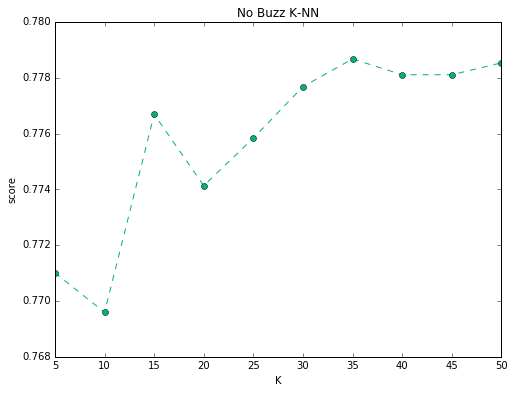

In [65]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Determine K by cross-validation.
x_cv_train, x_cv_test, y_cv_train, y_cv_test = train_test_split(x_train, y_train, test_size=0.3, random_state=None)

# We use K-values ranging from 1-10
k=[5,10,15,20,25,30,35,40,45,50]

# Train a model on the trainng set and use that model to predict on the testing set
predicted_knn=[KNeighborsClassifier(n_neighbors=i).fit(x_cv_train,y_cv_train).predict(x_cv_test) for i in k]

#Compute accuracy on the testing set for each value of k
score_knn=[metrics.accuracy_score(predicted_knn[i],y_cv_test) for i in range(10)]

print score_knn

# Plot accuracy on the test set vs. k
fig=plt.figure(figsize=(8,6))
plt.plot([5,10,15,20,25,30,35,40,45,50], score_knn, 'bo--',label='knn', color=green)
plt.title('No Buzz K-NN')
plt.xlabel('K')
plt.ylabel('score')

In [66]:
# Make predictions based on the best model above
y_predicted_knn = KNeighborsClassifier(n_neighbors=7).fit(x_train,y_train).predict(x_test)

[[10034  1762]
 [ 1880  1976]]


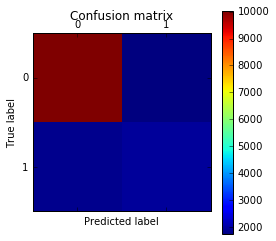

In [67]:
# See how KNN did on its own.
# Print and plot a confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted_knn)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Final Predictions: Ensemble Learning

[[9482 2314]
 [1178 2678]]


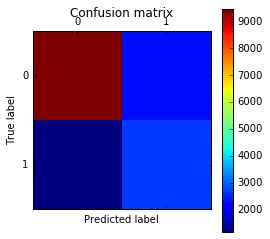

Prediction Accuracy
0.776897521084


In [68]:
# Predict no_buzz = True if either RF or KNN predict no_buzz = True
y_predicted = y_predicted_knn + y_predicted_rf

# Print and plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print prediction accuracy
print 'Prediction Accuracy'
print (cm[0,0]+cm[1,1])/float(cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1])

### Background analysis/exploration.

### IMPORTANT NOTE: The code cells above this one are the complete "solution" cells for problem 3.  What follows was additional exploration/analysis.  It was not used in our results, but we retained it in this notebook for completeness.

Here we try to use PCA to improve our results.

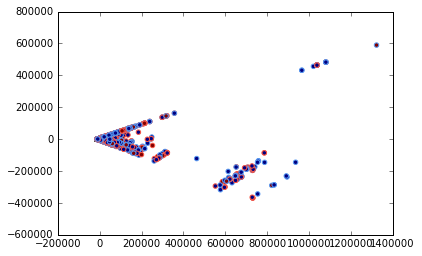

In [50]:
from sklearn.decomposition import PCA
pca = PCA(4)
plot_columns = pca.fit_transform(df[features1])
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=df['unpopular'], color=[red, blue])
plt.show()

In [113]:
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(plot_columns, df.buzz_factor, test_size=0.4, random_state=None)
x_train.shape

(23478L, 4L)

In [114]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test)
mean_squared_error(predictions, y_test)

2445.0356821514774

In [115]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=60, min_samples_leaf=10, random_state=1)
model2.fit(x_train, y_train)
predictions = model2.predict(x_test)
mean_squared_error(predictions, y_test)

2430.7401296301709

### A brief exploration


In [43]:
df[
    ['shares','n_tokens_title', 'n_tokens_content', 'n_unique_tokens']
].describe()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens
count,39130.000000,39130.000000,39130.000000,39130.000000
mean,2604.414925,10.394505,546.975824,0.548304
std,3356.840372,2.112438,470.309240,3.543710
min,1.000000,2.000000,0.000000,0.000000
25%,941.000000,9.000000,247.000000,0.470777
50%,1400.000000,10.000000,410.000000,0.538987
75%,2700.000000,12.000000,716.750000,0.608209
max,26600.000000,23.000000,8474.000000,701.000000


In [44]:
# Avg number of words in title and popular article content
popular_articles = df.ix[data_frame['shares'] >= 1400]
popular_articles[
    ['shares','n_tokens_title', 'n_tokens_content','n_unique_tokens']
].describe()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,4122.785853,10.301550,566.091957,0.557952
std,4052.960447,2.120151,507.147459,4.877742
min,1400.000000,2.000000,0.000000,0.000000
25%,1800.000000,9.000000,246.000000,0.462785
50%,2600.000000,10.000000,414.000000,0.534566
75%,4600.000000,12.000000,747.000000,0.606147
max,26600.000000,23.000000,8474.000000,701.000000


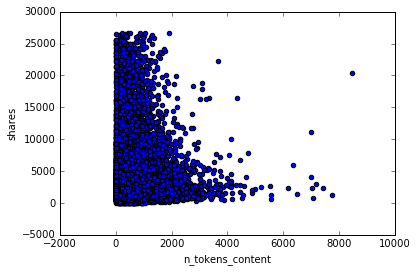

In [50]:
# Mean shares for each article type
type_articles = df.pivot_table('shares', index=[
        'is_lifestyle', 'is_entertainment', 'is_business', 'is_social_media', 'is_tech', 'is_world'
    ], aggfunc=[np.mean])
print type_articles

type_articles.plot(kind='bar', color=red)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean shares by article type')
plt.xlabel('Article type')
plt.ylabel('Shares')

#### On avg, which day has more shares 

# On avg, which day has more shares 

day_articles = df.pivot_table('shares', index=[
        'is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday', 'is_saturday', 'is_sunday'
    ], aggfunc=[np.mean])
print day_articles

day_articles.plot(kind='bar', color=green)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean shares by day')
plt.xlabel('Day')
plt.ylabel('Shares')

# Mean shares for tech and not tech channels during and not during weekends
df.pivot_table('shares', index=['is_weekend'], columns=['is_tech'], aggfunc=[np.mean], margins=True)

# Mean tech shares during work week (Monday to Friday)
tech_articles = df.ix[data_frame['is_tech'] == 1]
tech_articles = tech_articles.pivot_table('shares', index=[
        'is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday'
    ], aggfunc=[np.mean])
print tech_articles

tech_articles.plot(kind='bar', color=blue)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Mean Tech Article Shares by Week Day')
plt.xlabel('Week Day')
plt.ylabel('Shares')

# Explore relationship with some features and number of shares
df.plot(kind='scatter', x='n_tokens_title', y='shares')

df.plot(kind='scatter', x='n_tokens_content', y='shares')

df.plot(kind='scatter', x='n_unique_tokens', y='shares')

In [ ]:
json = df.to_json()
print json

---

*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 4".